# Import 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

from sklearn.preprocessing import MinMaxScaler

# Loading Ingesting the data

In [5]:
employees = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [6]:
# employees.head()
# employees.tail()
employees.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
428,47,No,Travel_Rarely,983,Research & Development,2,2,Medical,1,574,...,3,80,3,20,2,3,5,0,0,4
129,49,No,Travel_Rarely,470,Research & Development,20,4,Medical,1,170,...,3,80,0,16,2,2,15,11,5,11
1062,44,No,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,...,2,80,0,16,2,2,2,2,2,2
684,40,No,Travel_Rarely,658,Sales,10,4,Marketing,1,954,...,2,80,1,11,2,2,1,0,0,0
964,34,No,Travel_Rarely,507,Sales,15,2,Medical,1,1356,...,4,80,0,10,6,4,10,8,9,6


# Cleaning

## Data quality and consistency

In [7]:
employees.shape

(1470, 35)

In [8]:
print(employees.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
employees.duplicated().sum()

np.int64(0)

## Data types and structure

In [10]:
employees.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## Outliers and anomalies

In [11]:
(employees.select_dtypes(include="int64") < 0).sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

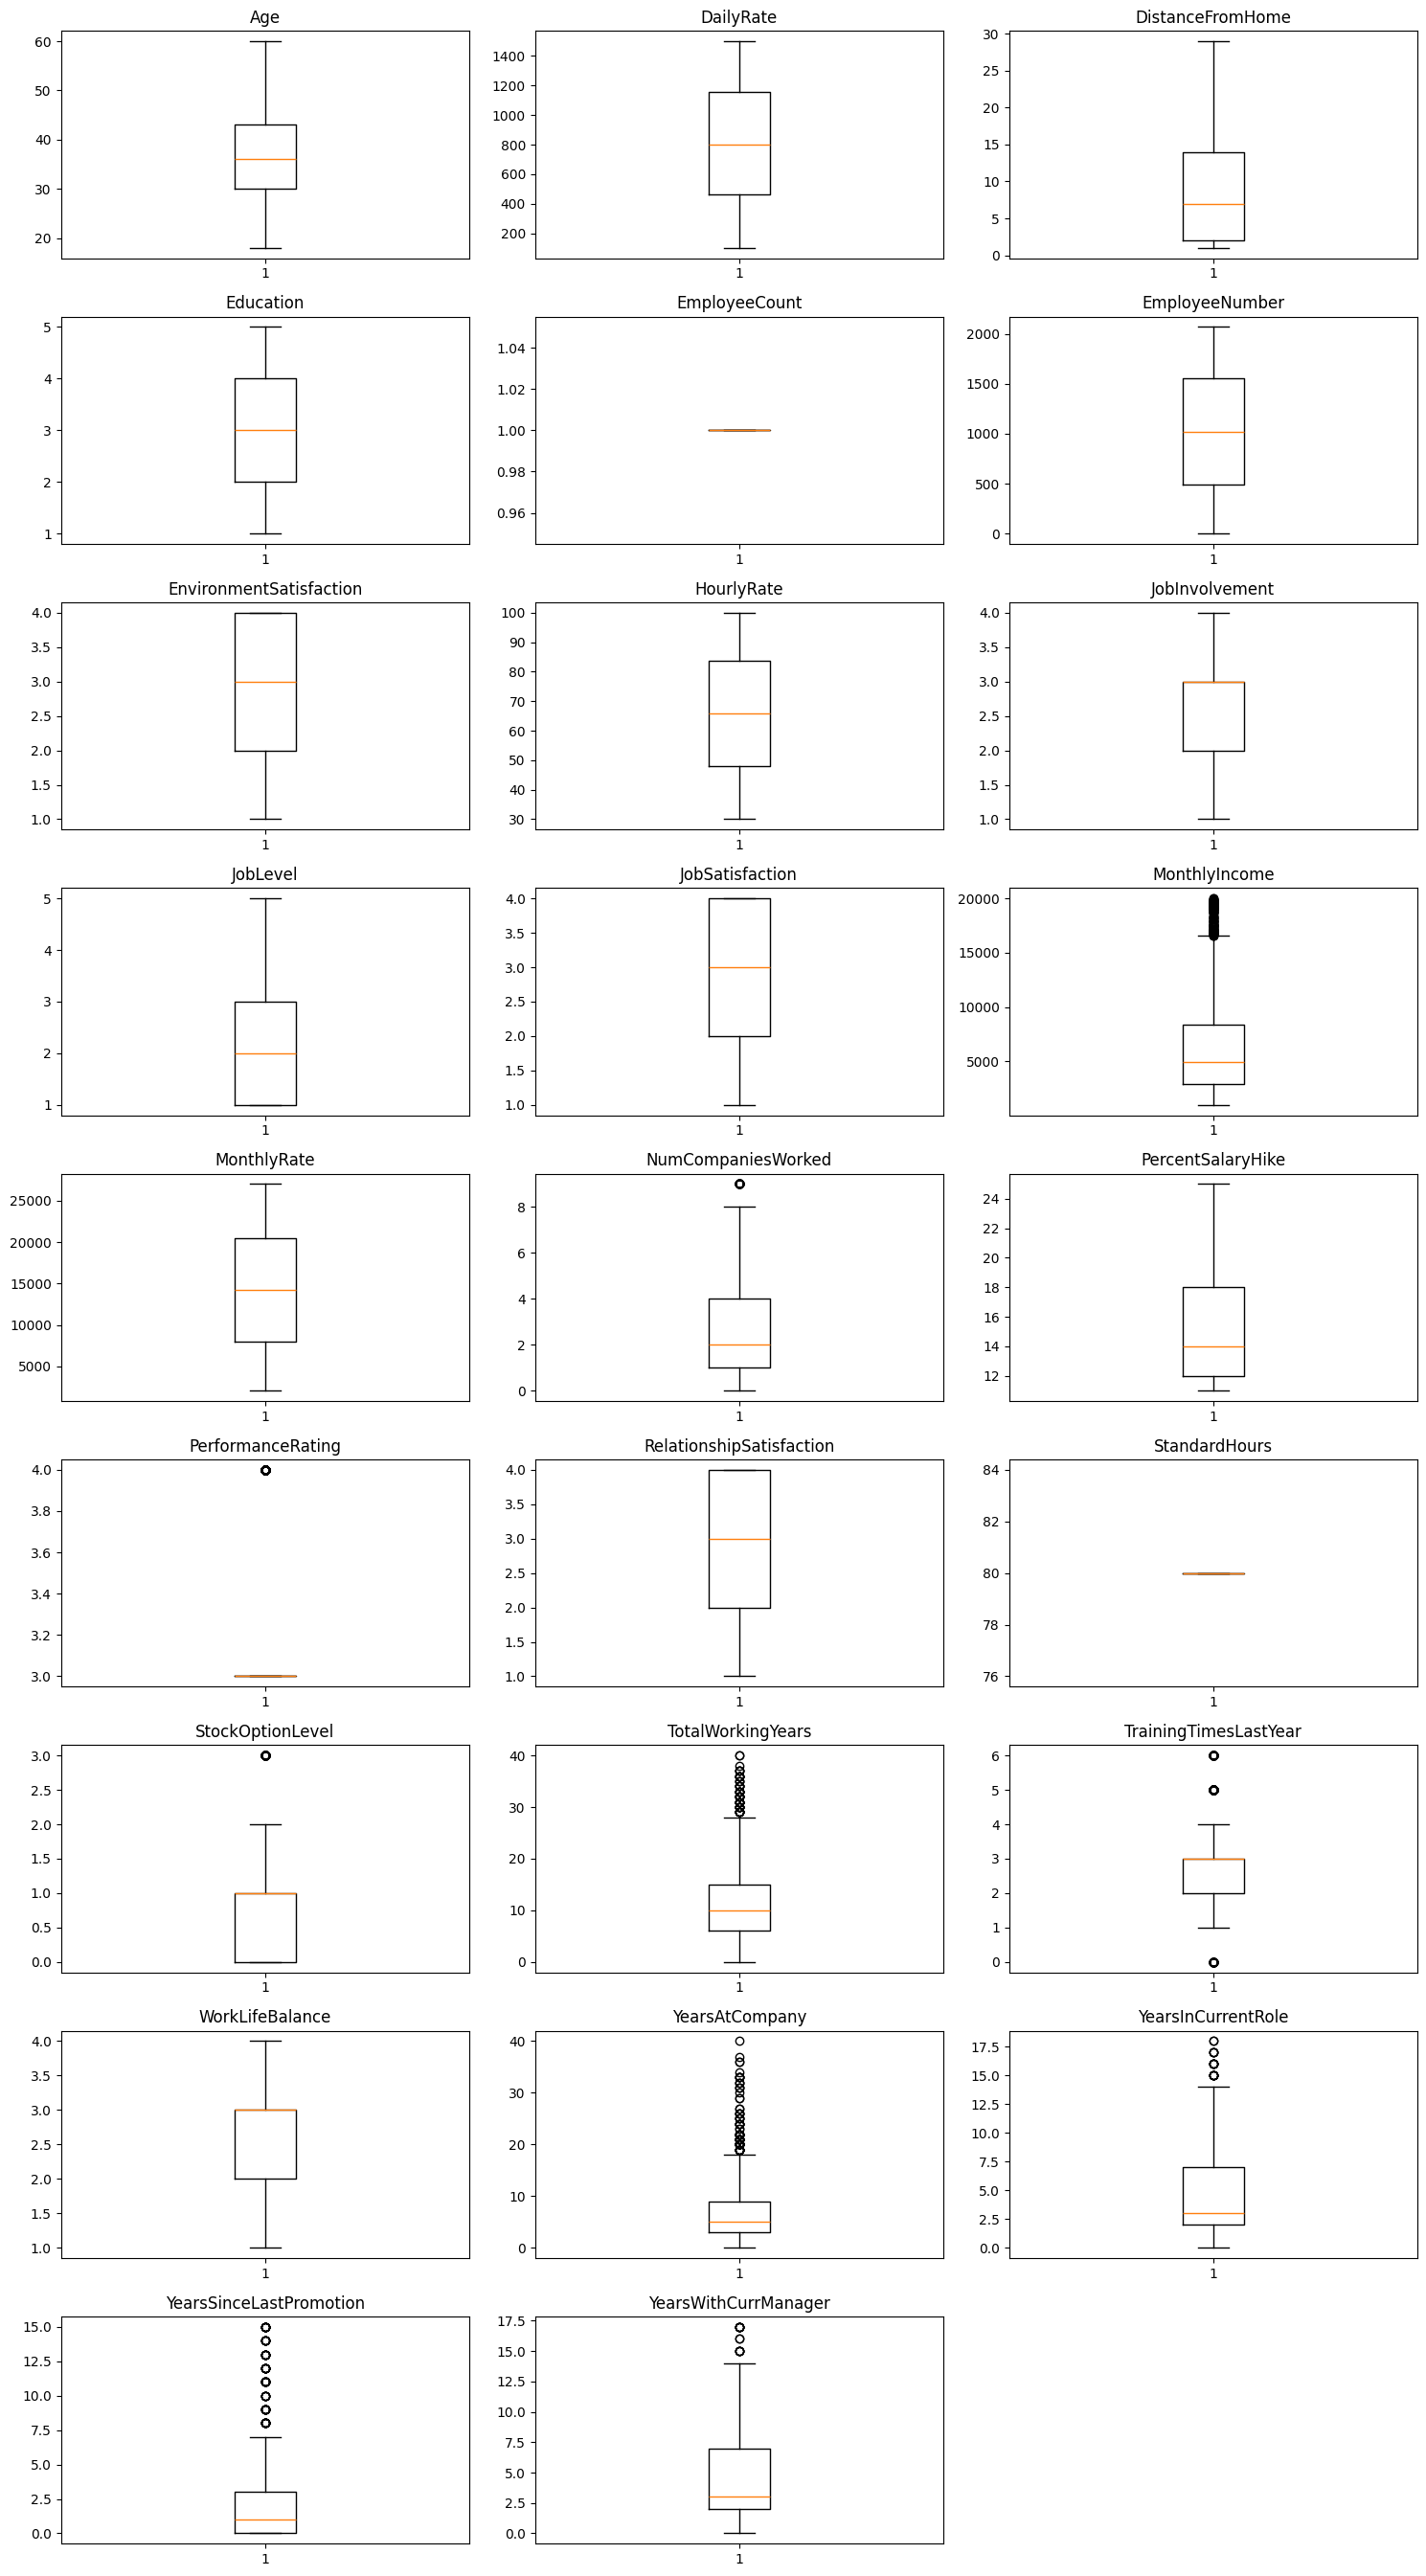

In [12]:
# Select int64 columns
show_outliers = employees.select_dtypes(include="int64")

# Determine layout: 3 columns per row
n_cols = 3
n_plots = len(show_outliers.columns)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Make it easy to iterate

for i, col in enumerate(show_outliers.columns):
    axes[i].boxplot(show_outliers[col], whis=1.5)
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see alot of outliers in YearsAtCompany, TotalWorkingYears, MonthlyIncome

In [ ]:
# outlier_summary = {}
# for col in show_outliers.columns:
#     Q1 = show_outliers[col].quantile(0.25)
#     Q3 = show_outliers[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     outlier_count = ((show_outliers[col] < lower) | (show_outliers[col] > upper)).sum()
#     outlier_summary[col] = outlier_count

# print(outlier_summary)

In [ ]:
# 1. Vælg kun int64-kolonner
show_outliers = employees.select_dtypes(include="int64")

# 2. Beregn IQR for hver kolonne
Q1 = show_outliers.quantile(0.25)
Q3 = show_outliers.quantile(0.75)
IQR = Q3 - Q1

# 3. Find outliers og erstat med median
cleaned = show_outliers.copy()
for col in cleaned.columns:
    lower = Q1[col] - 2 * IQR[col]
    upper = Q3[col] + 2 * IQR[col]
    median_val = cleaned[col].median()

    cleaned[col] = cleaned[col].mask(
        (cleaned[col] < lower) | (cleaned[col] > upper),
        median_val
    )

# 4. Sæt de rensede kolonner tilbage i employees
employees_filled = employees.copy()
employees_filled[cleaned.columns] = cleaned

employees_filled.shape

(1470, 35)

In [14]:
employees_filled.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1166,48,No,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,...,2,80,1,23,3,3,2,2,2,2
1390,28,Yes,Travel_Rarely,1404,Research & Development,17,3,Technical Degree,1,1960,...,1,80,1,6,2,2,4,1,0,3
360,57,No,Travel_Rarely,593,Research & Development,1,4,Medical,1,482,...,3,80,0,15,2,3,3,2,1,2
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
1310,58,No,Travel_Frequently,1216,Research & Development,15,4,Life Sciences,1,1837,...,2,80,0,23,3,3,2,2,2,2
951,41,No,Non-Travel,256,Sales,10,2,Medical,1,1329,...,1,80,0,19,4,3,19,2,1,9
1429,39,No,Travel_Rarely,116,Research & Development,24,1,Life Sciences,1,2014,...,1,80,0,18,2,3,7,7,1,7
305,36,No,Non-Travel,1105,Research & Development,24,4,Life Sciences,1,419,...,3,80,1,11,3,3,9,8,0,8
1199,36,No,Travel_Rarely,1351,Research & Development,26,4,Life Sciences,1,1682,...,2,80,2,10,2,2,3,2,0,2
1420,41,No,Travel_Rarely,642,Research & Development,1,3,Life Sciences,1,1999,...,1,80,1,12,3,3,5,3,1,0


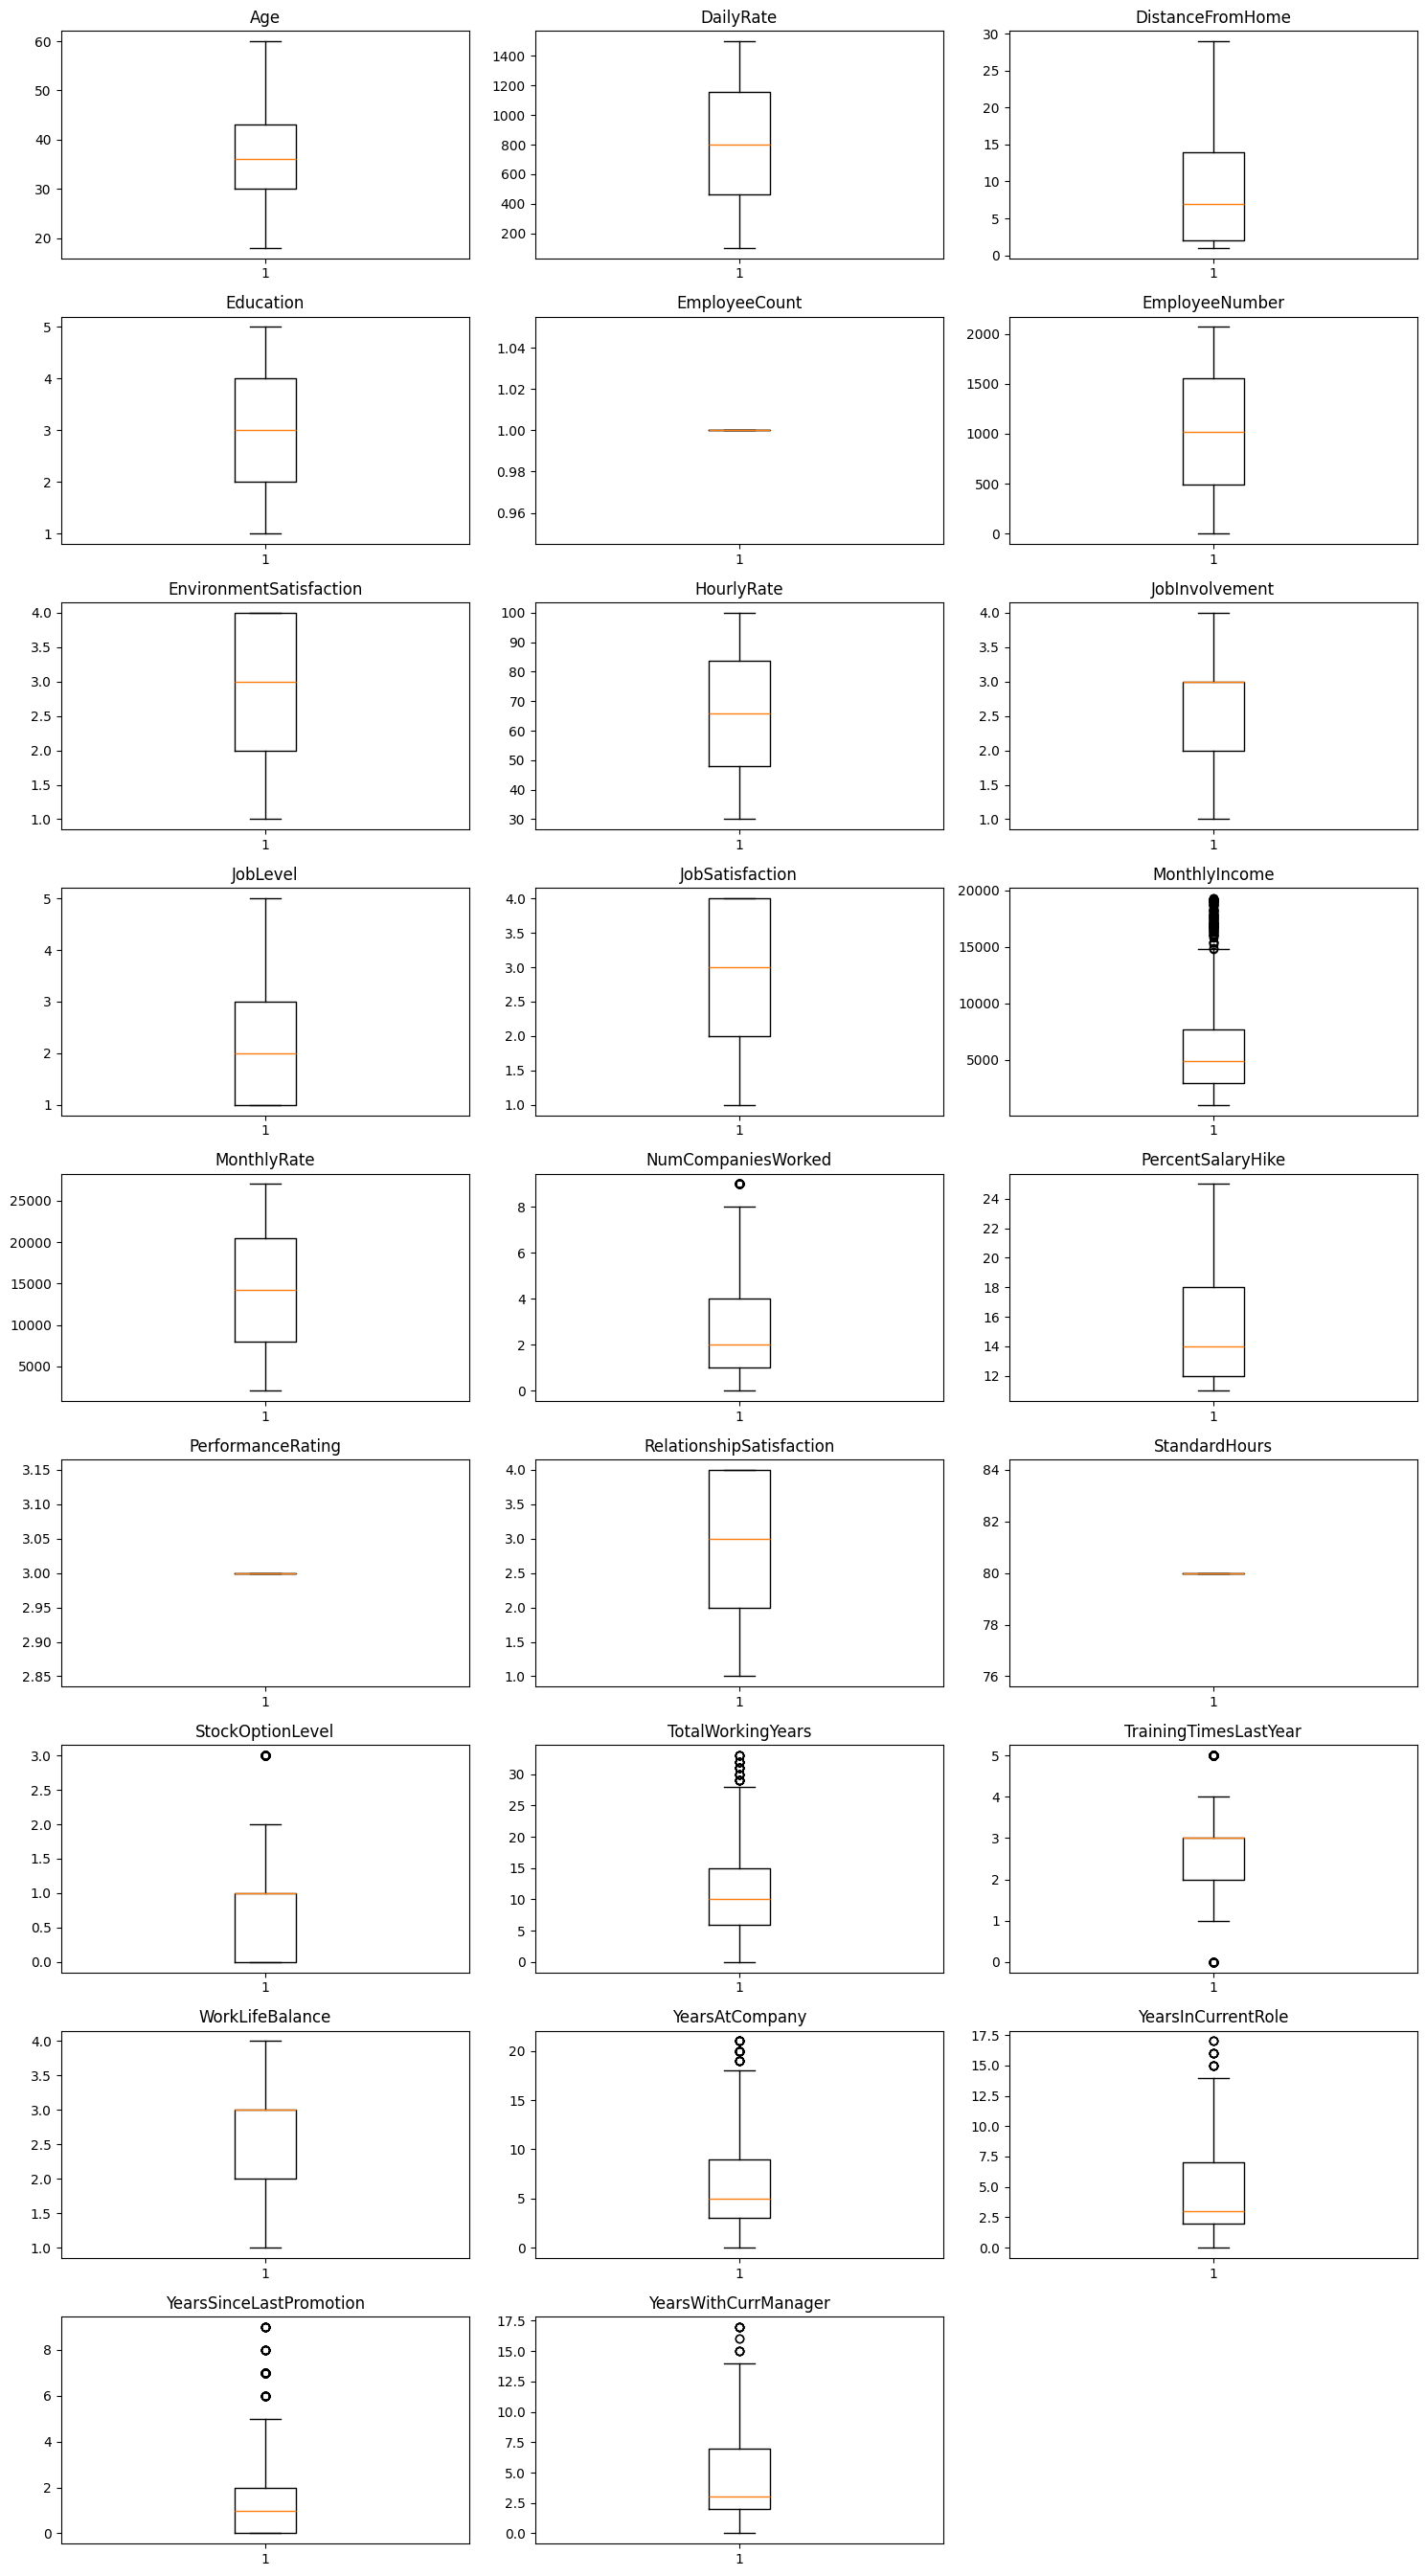

In [15]:
# Select int64 columns
show_number_columns = employees_filled.select_dtypes(include="int64") 

# Determine layout: 3 columns per row
n_cols = 3
n_plots = len(show_number_columns.columns)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Make it easy to iterate

for i, col in enumerate(show_number_columns.columns):
    axes[i].boxplot(show_number_columns[col], whis=1.5)
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There are still alot of outliers in MonthlyIncome, but each time we remove som datapoints there are new outliers, but this set, looks like it got alot less outliers, that will mess with the predictions later on. so we only do this removing outliers step to get better "normal" data for use in predection 

# Exploring

In [16]:
employees_filled.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,10.907483,2.666667,2.761224,6.230612,4.208844,1.627891,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.184215,1.092292,0.706476,4.698886,3.587559,2.205176,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,33.000000,5.000000,4.000000,21.000000,17.000000,9.000000,17.000000


In [17]:
employees_filled.shape

(1470, 35)

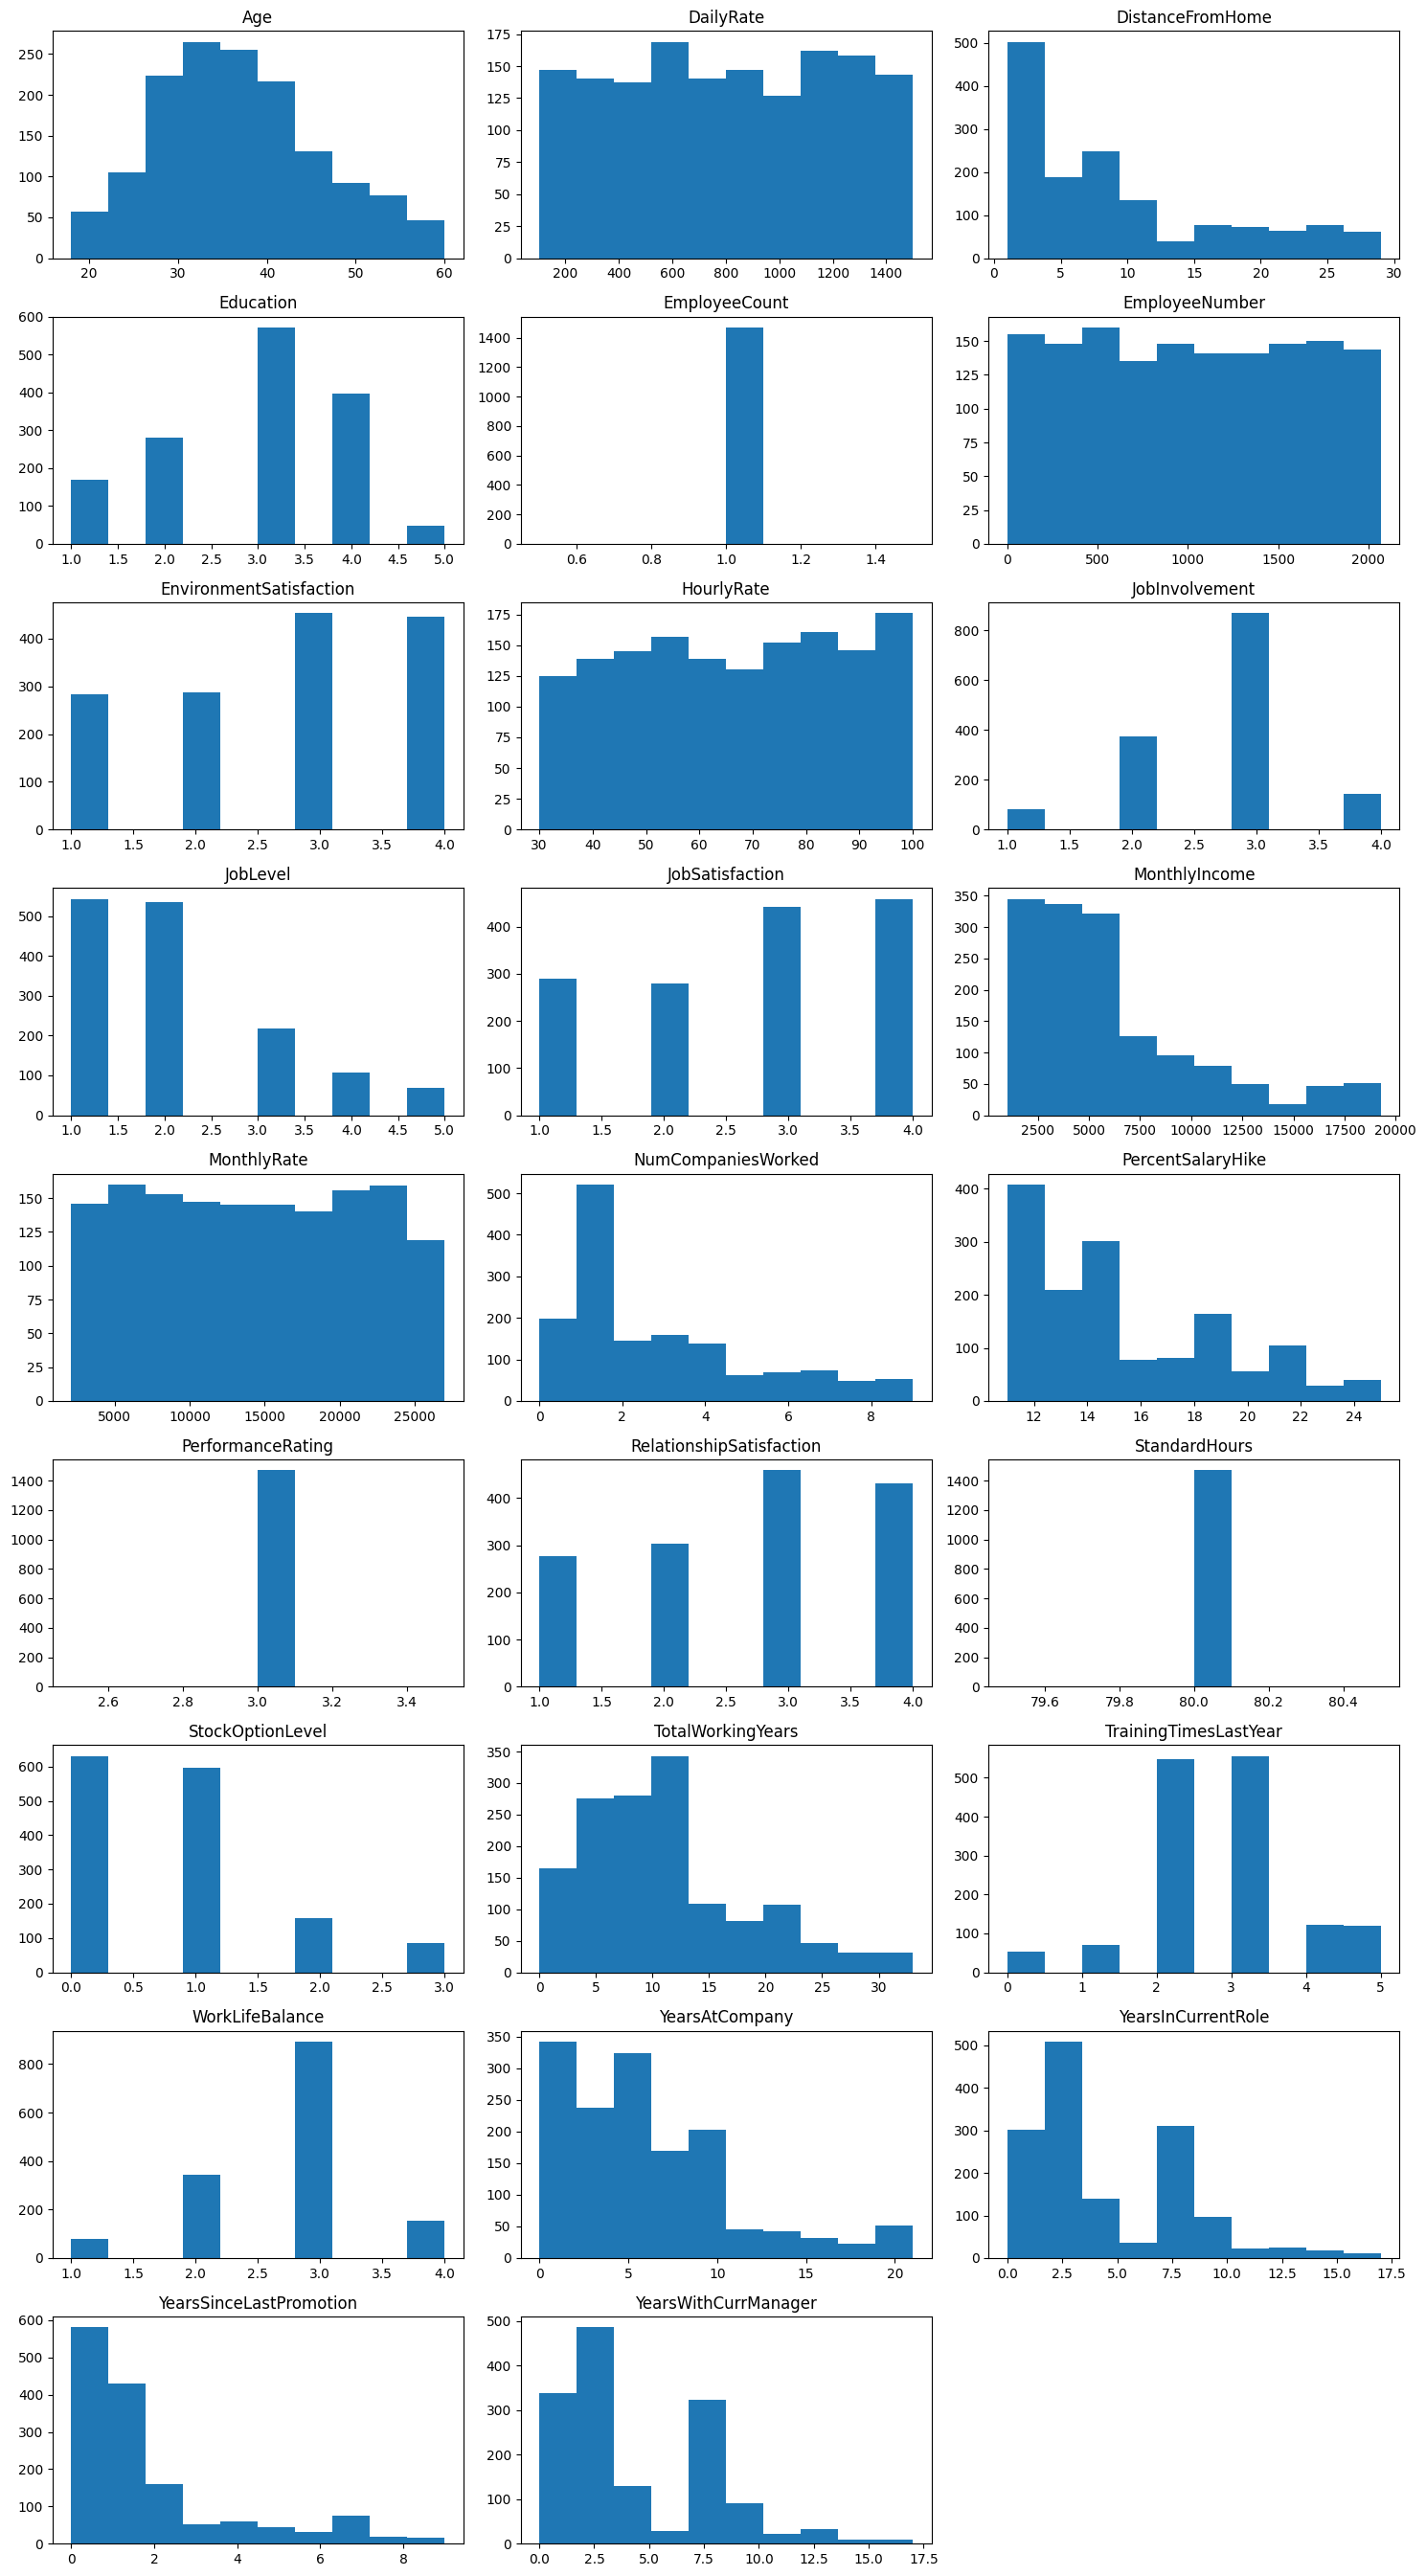

In [18]:
# Select int64 columns
show_number_columns = employees_filled.select_dtypes(include="int64") 

# Determine layout: 3 columns per row
n_cols = 3
n_plots = len(show_number_columns.columns)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Make it easy to iterate

for i, col in enumerate(show_number_columns.columns):
    axes[i].hist(show_number_columns[col])
    axes[i].set_title(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Explore data by answering the questions -> the corr for find variable to do machine learning?

In [28]:
employees_filled.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Which are the most decisive factors for quitting a job? Why do people quit their job?

hypothesis: Salary
hypothesis: overtime work
hypothesis: JobSatisfaction
hypothesis: JobInvolvement


Which work positions and departments are in higher risk of losing employees?

hypothesis:

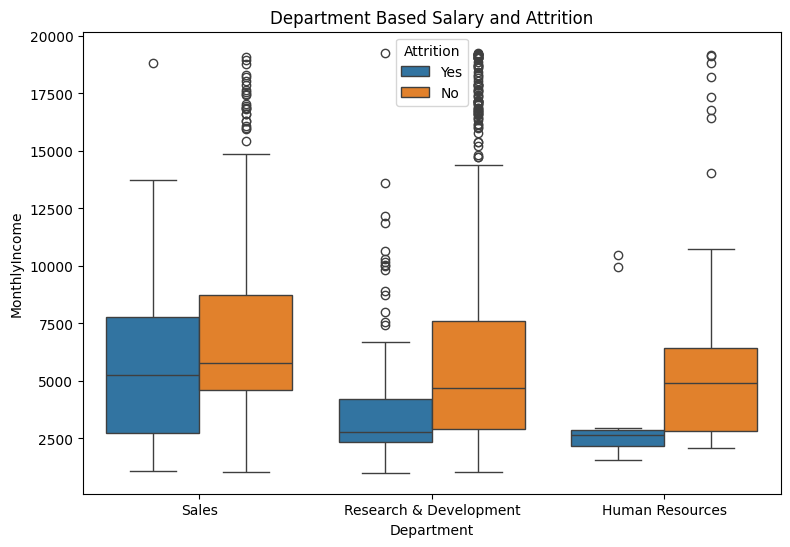

In [27]:
plt.figure(figsize=(9,6))
sb.boxplot(x="Department", y="MonthlyIncome", hue="Attrition", data=employees_filled)
plt.title('Department Based Salary and Attrition')
plt.show()

In [19]:
employees_filled.corr

<bound method DataFrame.corr of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

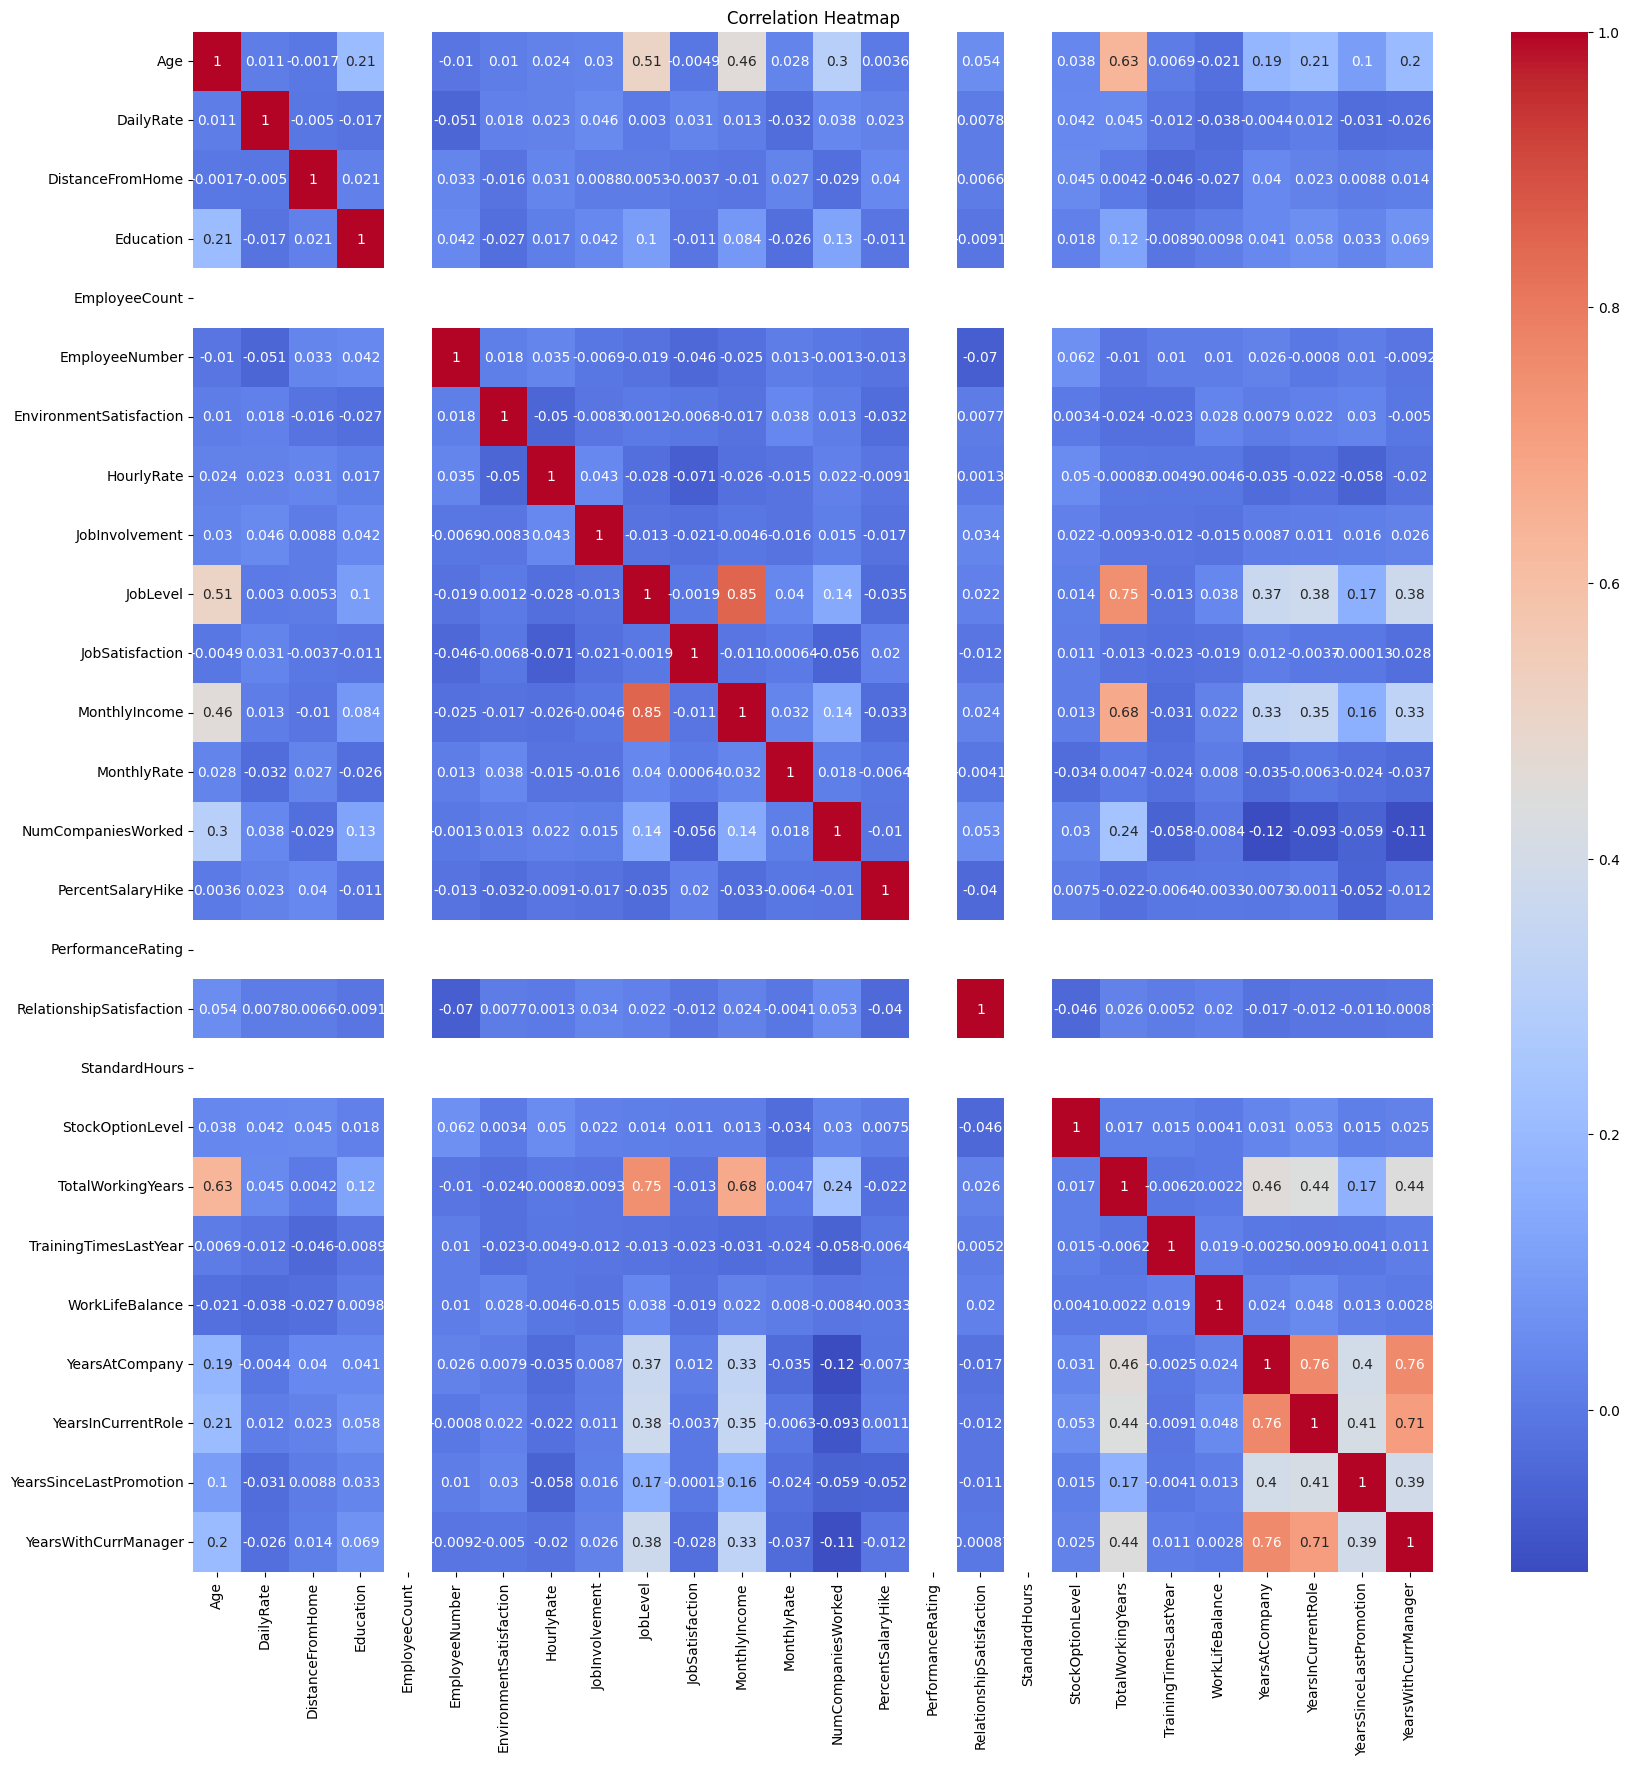

In [24]:
show_number_columns

# Lav korrelationsmatrix
correlation_matrix = show_number_columns.corr()

# Plot korrelations-heatmap
plt.figure(figsize=(20, 20))
sb.heatmap(correlation_matrix, 
           annot=True, 
           cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()